### Dataset
* https://www.kaggle.com/datasets/mohithsairamreddy/salary-data

### EDA
* https://www.kaggle.com/code/ishantgargml/salary-data-eda-with-challenges
* https://www.kaggle.com/code/prnvthkkr/prediction-using-random-forest


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

### Loading dataset

In [53]:
data = pd.read_csv('Dataset.csv')

In [54]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### EDA

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


check null values

In [56]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [57]:
# dropping null values
data.dropna(inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


Delete duplicate rows

In [59]:
data.drop_duplicates(inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1787 non-null   float64
 1   Gender               1787 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1787 non-null   object 
 4   Years of Experience  1787 non-null   float64
 5   Salary               1787 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.7+ KB


Analysis of all the columns

In [61]:
data.describe()

,Age,Years of Experience,Salary
count,1787.000000,1787.000000,1787.000000
mean,35.139899,9.156128,113184.659765
std,8.213045,6.844924,51596.536766
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


d:\After_graduation\Python\salary-estimator\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


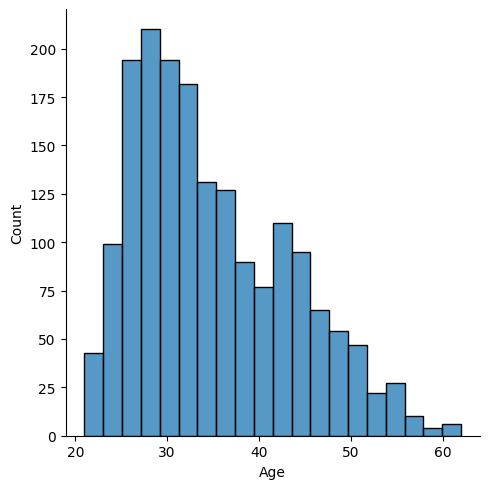

In [62]:
sns.displot(x = 'Age', data = data, bins = 20)

d:\After_graduation\Python\salary-estimator\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


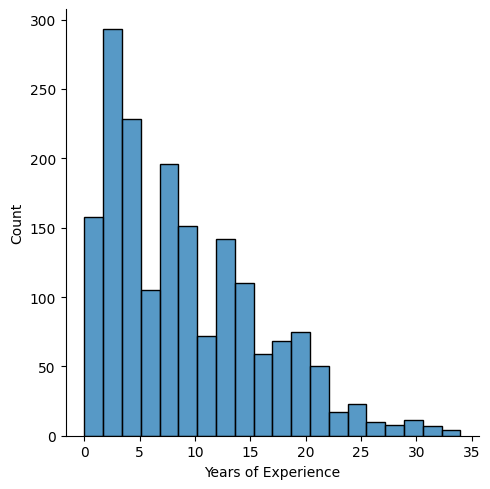

In [63]:
sns.displot(x = 'Years of Experience', data = data, bins = 20)

d:\After_graduation\Python\salary-estimator\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


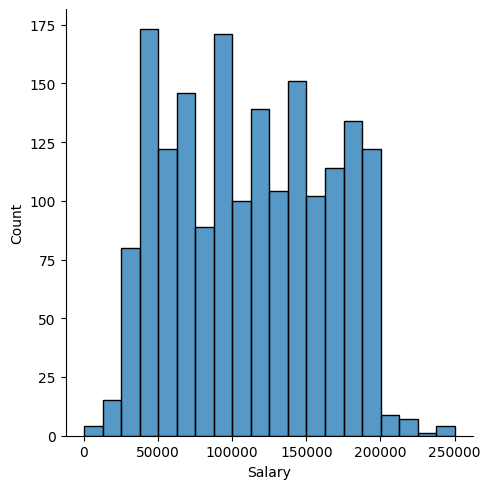

In [64]:
sns.displot(x = 'Salary', data = data, bins = 20)

relation between YOE and salary

Text(0, 0.5, 'Salary')

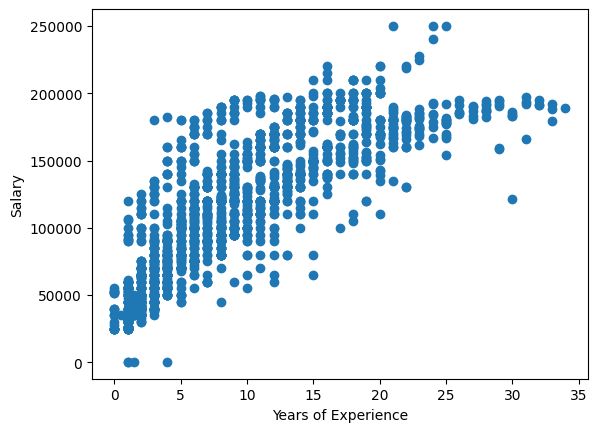

In [65]:
plt.scatter(x = 'Years of Experience', y = 'Salary', data = data)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

checking how many records are present for particular YOE

In [66]:
#data.groupby('Years of Experience')['Years of Experience'].count()\
data['Years of Experience'].value_counts()

Years of Experience
2.0     151
3.0     142
1.0     126
4.0     124
8.0     105
6.0     105
5.0     104
7.0      91
9.0      85
12.0     80
11.0     72
10.0     66
14.0     63
13.0     62
16.0     59
15.0     47
18.0     46
19.0     44
20.0     31
21.0     27
22.0     23
17.0     22
0.0      20
23.0     17
25.0     14
1.5      11
24.0      9
28.0      8
29.0      6
30.0      5
27.0      5
26.0      5
31.0      4
33.0      3
32.0      3
0.5       1
34.0      1
Name: count, dtype: int64

check for unique job titles and total nuber of records present for them

In [67]:
data['Job Title'].nunique()

191

In [68]:
data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

mapping 191 job titles into 10 generalized job titles.

In [69]:
def map_job_title_to_category(job_title):
    job_categories = {
        "Software and Technology": ["Software Engineer", "Data Analyst", "Software Developer", "IT Support Specialist",
                                    "Network Engineer", "Web Developer", "UX Designer", "Technical Writer",
                                    "Technical Support Specialist", "Full Stack Engineer"],
        "Management and Leadership": ["Senior Manager", "Director", "VP of Operations", "CEO", "Director of Marketing",
                                      "Operations Manager", "VP of Finance", "Chief Technology Officer",
                                      "Director of Operations", "Chief Data Officer"],
        "Sales and Marketing": ["Sales Associate", "Marketing Analyst", "Sales Manager", "Marketing Coordinator",
                                "Marketing Manager", "Sales Director", "Business Development Manager",
                                "Digital Marketing Manager", "Sales Representative", "Director of Sales"],
        "Finance and Accounting": ["Financial Analyst", "Financial Manager", "Accountant", "Senior Financial Analyst",
                                   "Junior Accountant", "Financial Advisor", "Chief Financial Officer (CFO)",
                                   "Senior Accountant", "Senior Financial Manager", "Senior Account Executive"],
        "Human Resources and Recruitment": ["HR Manager", "HR Generalist", "Recruiter", "Human Resources Director",
                                            "Junior HR Generalist", "Junior Recruiter", "Director of Human Resources",
                                            "Human Resources Coordinator", "Junior HR Coordinator",
                                            "Director of Human Capital"],
        "Operations and Project Management": ["Project Manager", "Operations Manager", "Project Engineer",
                                              "Operations Director", "Supply Chain Manager", "Operations Analyst",
                                              "Office Manager", "Junior Operations Analyst", "Senior Operations Manager",
                                              "Junior Operations Manager"],
        "Research and Analysis": ["Senior Scientist", "Data Scientist", "Research Director", "Research Scientist",
                                  "Senior Data Scientist", "Senior Research Scientist", "Junior Data Analyst",
                                  "Senior Marketing Analyst", "Senior Operations Analyst", "Junior Research Scientist"],
        "Creative and Design": ["Product Manager", "Product Designer", "Graphic Designer", "UX Designer", "Copywriter",
                                "Creative Director", "Web Designer", "UX Researcher", "Digital Content Producer",
                                "Junior Web Designer"],
        "Customer Service and Support": ["Customer Service Rep", "Customer Success Rep", "Customer Service Manager",
                                         "Help Desk Analyst", "Customer Success Manager", "Junior Customer Support Specialist",
                                         "Receptionist", "Junior Social Media Specialist", "Junior Social Media Manager",
                                         "Delivery Driver"]
    }

    for category, category_titles in job_categories.items():
        if job_title in category_titles:
            return category

    return "Others"

making use of apply method for this

In [70]:
data['Job Title'] = data['Job Title'].apply(map_job_title_to_category)

In [71]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software and Technology,5.0,90000.0
1,28.0,Female,Master's,Software and Technology,3.0,65000.0
2,45.0,Male,PhD,Management and Leadership,15.0,150000.0
3,36.0,Female,Bachelor's,Sales and Marketing,7.0,60000.0
4,52.0,Male,Master's,Management and Leadership,20.0,200000.0


In [72]:
data['Job Title'].value_counts()

Job Title
Others                               862
Software and Technology              312
Sales and Marketing                  184
Research and Analysis                136
Creative and Design                   74
Management and Leadership             66
Human Resources and Recruitment       58
Finance and Accounting                57
Operations and Project Management     25
Customer Service and Support          13
Name: count, dtype: int64

In [73]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

Here
* Bachelor's & Bachelor's Degree are same
* Master's & Master's Degree are same
* PhD & phD are same


In [74]:
data['Education Level'] = data['Education Level'].replace({"Bachelor's Degree": "Bachelor's",
                                                           "Master's Degree": "Master's",
                                                           "PhD" : "phD"})

In [75]:
data['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Check for job titles that offers more salary

Text(0.5, 1.0, 'Top 10 Job Titles those offer max salary')

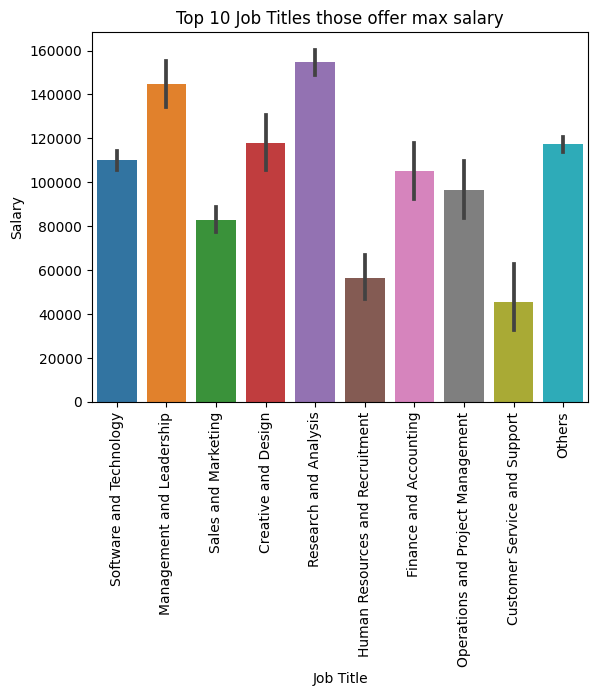

In [76]:
sns.barplot(x = 'Job Title', y = 'Salary', data = data)
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles those offer max salary')

Applying one hot encoding

In [77]:
data = pd.get_dummies(data = data)

In [78]:
data.head()

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_phD,Job Title_Creative and Design,Job Title_Customer Service and Support,Job Title_Finance and Accounting,Job Title_Human Resources and Recruitment,Job Title_Management and Leadership,Job Title_Operations and Project Management,Job Title_Others,Job Title_Research and Analysis,Job Title_Sales and Marketing,Job Title_Software and Technology
0,32.0,5.0,90000.0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,28.0,3.0,65000.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,45.0,15.0,150000.0,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,36.0,7.0,60000.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,52.0,20.0,200000.0,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


dropping Gender_Other,Education Level_High School & Job Title_Others columns

In [79]:
data = data.drop(columns = ['Gender_Other', 'Job Title_Others','Education Level_High School'])

In [80]:
data.head()

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_phD,Job Title_Creative and Design,Job Title_Customer Service and Support,Job Title_Finance and Accounting,Job Title_Human Resources and Recruitment,Job Title_Management and Leadership,Job Title_Operations and Project Management,Job Title_Research and Analysis,Job Title_Sales and Marketing,Job Title_Software and Technology
0,32.0,5.0,90000.0,False,True,True,False,False,False,False,False,False,False,False,False,False,True
1,28.0,3.0,65000.0,True,False,False,True,False,False,False,False,False,False,False,False,False,True
2,45.0,15.0,150000.0,False,True,False,False,True,False,False,False,False,True,False,False,False,False
3,36.0,7.0,60000.0,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,52.0,20.0,200000.0,False,True,False,True,False,False,False,False,False,True,False,False,False,False


Applying Random Forest Regression

In [81]:
X = data.drop(columns = ['Salary'])
y = data['Salary']

In [82]:
X.head()

,Age,Years of Experience,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_phD,Job Title_Creative and Design,Job Title_Customer Service and Support,Job Title_Finance and Accounting,Job Title_Human Resources and Recruitment,Job Title_Management and Leadership,Job Title_Operations and Project Management,Job Title_Research and Analysis,Job Title_Sales and Marketing,Job Title_Software and Technology
0,32.0,5.0,False,True,True,False,False,False,False,False,False,False,False,False,False,True
1,28.0,3.0,True,False,False,True,False,False,False,False,False,False,False,False,False,True
2,45.0,15.0,False,True,False,False,True,False,False,False,False,True,False,False,False,False
3,36.0,7.0,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,52.0,20.0,False,True,False,True,False,False,False,False,False,True,False,False,False,False


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape, X_test.shape

((1429, 16), (358, 16))

In [85]:
training_model = RandomForestRegressor()

In [86]:
training_model.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
training_model.score(X_test, y_test)

0.8617626291033611

Since we have a limited data 86.3% accuracy might be commendable.

Train our model with entire dataset

In [88]:
model = RandomForestRegressor()

In [89]:
model.fit(X, y)

RandomForestRegressor()

Create joblib file

In [90]:
joblib.dump(model,'salary_estimator.joblib')

['salary_estimator.joblib']